### Predicting Winner in League of Legends Ranked Matches

Datasets:

Ranked Games: https://www.kaggle.com/datasnaek/league-of-legends

High ELO Ranked Games: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020


In [4]:
import pandas as pd
import seaborn as sns

### Predicting Winner in Ranked Matches

In [12]:
matches = pd.read_csv("games.csv")
matches = matches.drop(columns=["gameId", "creationTime", "seasonId"])
matches

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,1,2,1,1,1,1,2,8,12,...,5,0,0,1,1,114,67,43,16,51
1,1851,1,1,1,1,0,1,1,119,7,...,2,0,0,0,0,11,67,238,51,420
2,1493,1,2,1,1,1,2,0,18,4,...,2,0,0,1,0,157,238,121,57,28
3,1758,1,1,1,1,1,1,0,57,4,...,0,0,0,0,0,164,18,141,40,51
4,2094,1,2,1,1,1,1,0,19,4,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,19,12,...,10,2,0,4,0,55,-1,90,238,157
51486,3304,2,1,1,2,2,2,2,90,4,...,11,7,4,4,1,157,55,119,154,105
51487,2156,2,2,2,2,0,1,0,141,11,...,10,2,0,2,0,113,122,53,11,157
51488,1475,2,2,2,2,0,2,0,121,11,...,11,3,0,1,0,154,39,51,90,114


<AxesSubplot:>

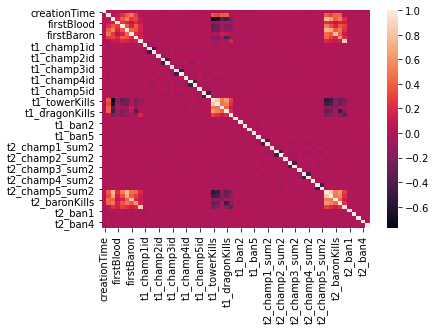

In [9]:
sns.heatmap(matches.drop(columns=["gameId", "seasonId"]).corr())

The correlation heatmap is very busy since there are a lot of variables. This is because variables like champ and ban is unique to each individual player (5v5, 10 players total). To reduce the number of features, we can run a principal component analysis before we train a model.

In [20]:
from sklearn.preprocessing import StandardScaler

#separating features
features = matches.drop(columns=["winner"])
X = features.values
#separating target
y = matches[["winner"]].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

array([[ 0.22780135,  1.01611295, -0.83013151, ..., -0.64031431,
        -0.89627166, -0.55536463],
       [ 0.03639986, -0.90577868, -0.83013151, ...,  1.26043446,
        -0.55760332,  3.03569623],
       [-0.66280151,  1.01611295, -0.83013151, ...,  0.1199852 ,
        -0.49954589, -0.77919769],
       ...,
       [ 0.63208818,  1.01611295,  1.0120213 , ..., -0.54284002,
        -0.94465285,  0.47621383],
       [-0.69795689,  1.01611295,  1.0120213 , ..., -0.56233487,
        -0.18023004,  0.05774332],
       [-0.75654918, -0.90577868, -0.83013151, ...,  0.31493379,
        -0.75112808, -0.87651641]])

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns = ["pca1", "pca2", "pca3", "pca4", "pca5"])

In [35]:
matches_df = pd.concat([pca_df, matches[['winner']]], axis = 1)
matches_df

,pca1,pca2,pca3,pca4,pca5,winner
0,-1.386306,1.684402,2.948198,1.091891,1.624409,1
1,-3.230578,0.685884,0.609557,-0.600662,-0.259008,1
2,-1.334929,-0.183490,-0.462580,0.222909,-1.014632,1
3,-2.829339,0.616063,-0.504651,-0.232809,-0.259329,1
4,-2.086067,1.360697,-0.273647,-0.233982,-1.021009,1
...,...,...,...,...,...,...
51485,2.370539,-1.331601,-1.386149,-0.260199,2.829648,2
51486,5.286520,4.510850,-0.144825,0.198307,0.252143,2
51487,1.675459,-1.226800,-1.203257,2.043438,1.198376,2
51488,2.233835,-2.124857,-1.215061,-0.731443,1.880817,2


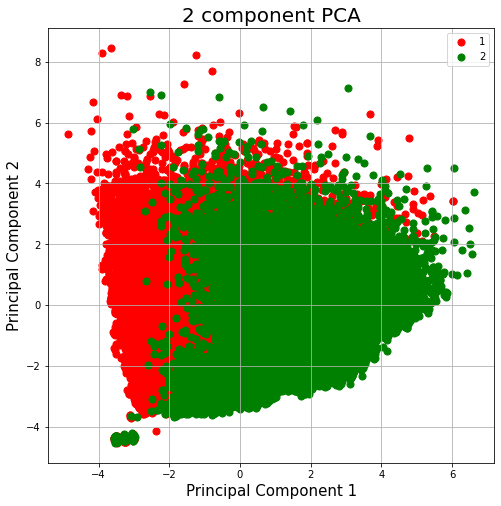

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_ylabel('Principal Component 3', fontsize = 15)
#ax.set_ylabel('Principal Component 4', fontsize = 15)
#ax.set_ylabel('Principal Component 5', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = matches_df['winner'] == target
    ax.scatter(matches_df.loc[indicesToKeep, 'pca1'],
               matches_df.loc[indicesToKeep, 'pca2'],
               #matches_df.loc[indicesToKeep, 'pca3'],
               #matches_df.loc[indicesToKeep, 'pca4'],
               #matches_df.loc[indicesToKeep, 'pca5'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [36]:
pca.explained_variance_ratio_

array([0.09486616, 0.05159781, 0.03067396, 0.02647542, 0.0263318 ])

Running a PCA shows us that reducing the number of features may not be the best approach. The explained variance ration is a metric used to measure how much of the data k number of principal componenets can explain. In this case, the top 5 features with the "best" principal components only account for a tiny fraction of the data. This makes sense since there are, essentially, an infinite number of variables 